#self augmentation:
augmentation: augment 2000 points 10 times to create virtual dataset of 20000,
then train model on that and average the gradient as an epoch
fine tune iterations each epoch, 1 thousand random samples from 25k each epoch, 25 epoch
measure l2norm anc accuracy at each epoch, generate noise, use that as new baseline
gaussian norm norm distribution stand dev is 1 multipplyu by l2 norm


In [2]:
import torchvision 
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as transforms   
import torch.optim as optim
from torchvision.transforms import RandomRotation
from torchvision.transforms import Pad
from torchvision.transforms import Resize
from torchvision.transforms import ToTensor
from torchvision.transforms import Compose
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from PIL import Image
from numpy.linalg import norm
from torch.cuda.random import device_count
from torchvision.datasets import CIFAR10
from torch.utils.data import random_split
import torch.optim as optim
import torchvision.transforms as transforms 
import torchvision 
import math
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import torch.nn.utils.prune as prune
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
from torch.autograd import Variable
#!pip install opacus


In [3]:
import scipy
import h5py

#mat = scipy.io.loadmat('/notebooks/data_cifar100_train.mat')
#mat2 = scipy.io.loadmat('/notebooks/data_cifar100_test.mat')


mat = scipy.io.loadmat('/notebooks/data_sim_train.mat')
mat2 = scipy.io.loadmat('/notebooks/data_sim_test.mat')
lab = scipy.io.loadmat('/notebooks/label_train.mat')
lab2 = scipy.io.loadmat('/notebooks/label_test.mat')

data = mat['data'] # use the key for data here
target = lab['data']

data = torch.from_numpy(data).float()
target = torch.from_numpy(target).long() # change type to your use case
target = torch.flatten(target)

data2 = mat2['data'] # use the key for data here
target2 = lab2['data']

data2 = torch.from_numpy(data2).float()
target2 = torch.from_numpy(target2).long() # change type to your use case
target2 = torch.flatten(target2)
dataset = torch.utils.data.TensorDataset(data, target)
testset = torch.utils.data.TensorDataset(data2, target2)

indices = list(range(0, 50000,1))
trainset1 = torch.utils.data.Subset(dataset, indices)
modelloader = torch.utils.data.DataLoader(trainset1, shuffle=True, num_workers=2, batch_size = 10000)

valid = list(range(40000, 50000,1))
validset1 = torch.utils.data.Subset(dataset, valid)
validloader = torch.utils.data.DataLoader(validset1, shuffle=True, num_workers=2,batch_size = 100)
testloader = torch.utils.data.DataLoader(testset, shuffle=True, num_workers=2, batch_size = 100)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
model = nn.Sequential( nn.Linear(4096, 10)).to(device)
torch.save(model.state_dict(), "dynamicstart")  

average accuracy after 99 iterations:84.14699999999999
[0.14057711]
[84.147]
average accuracy after 99 iterations:86.43499999999999
[0.14057711 0.07787453]
[84.147 86.435]
average accuracy after 99 iterations:87.636
[0.14057711 0.07787453 0.05966361]
[84.147 86.435 87.636]
average accuracy after 99 iterations:88.36
[0.14057711 0.07787453 0.05966361 0.04871241]
[84.147 86.435 87.636 88.36 ]
average accuracy after 99 iterations:88.88200000000002
[0.14057711 0.07787453 0.05966361 0.04871241 0.04356513]
[84.147 86.435 87.636 88.36  88.882]
average accuracy after 99 iterations:89.27799999999999
[0.14057711 0.07787453 0.05966361 0.04871241 0.04356513 0.03889003]
[84.147 86.435 87.636 88.36  88.882 89.278]
average accuracy after 99 iterations:89.723
[0.14057711 0.07787453 0.05966361 0.04871241 0.04356513 0.03889003
 0.03707734]
[84.147 86.435 87.636 88.36  88.882 89.278 89.723]
average accuracy after 99 iterations:89.95599999999999
[0.14057711 0.07787453 0.05966361 0.04871241 0.04356513 0.038

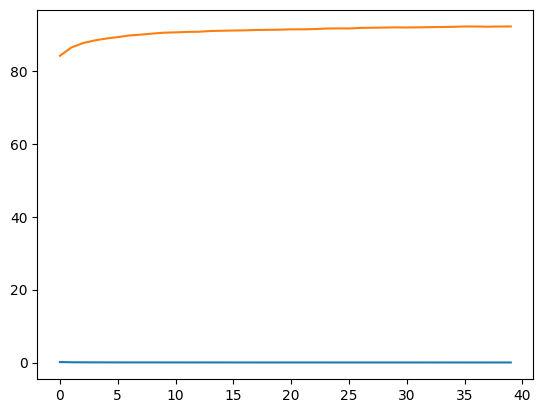

In [6]:
import random
def l2normupdated(data,size):
    count = 0
    total = 0
    avg = np.array([])
    for i in range(size):
        if i ==0:
            avg = data[i]
        else:
            avg = avg+data[i]
    avg = avg/size
    for i in range(size):
        data1 = avg-data[i]
        total += (np.linalg.norm(data1)/np.linalg.norm(data[i]))
    return total/size



toplot = np.array([])
toplot2 = np.array([])

for i in range(40):
    indices = torch.randperm(len(dataset))[:20000]
    #indiices = list(range(0, 20000,1))
    matrix = np.array([])
    count = 1
    avg = 0 
    topacc = 0
    testloader = torch.utils.data.DataLoader(testset, shuffle=True, num_workers=2, batch_size = 100)
    for a in range(10):
        start_index = a * 2000
        end_index = start_index + 2000
        sample = indices[start_index:end_index]
        trainset1 = torch.utils.data.Subset(dataset, sample)
        modelloader = torch.utils.data.DataLoader(trainset1, shuffle=False, num_workers=2, batch_size = 2000)
        #model gen
        model = nn.Sequential( nn.Linear(4096, 10)).to(device)
        model.load_state_dict(torch.load("/notebooks/dynamicstart"))
        model.to(device) 
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum = 0.9, nesterov = True1)
        ################################################################
          ################
          #training model
          ####################
        train_losslist = []
        n_epochs = [*range(10)]
        valid_loss_min = np.Inf # track change in validation loss
        for epoch in n_epochs:
            train_loss = 0.0
            train_loss1 = 0.0
            valid_loss = 0.0   
            model.train()
            for data, target in modelloader:
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()*data.size(0)

        ########################
        # testing model #
        ######################### 
        class_correct = list(0. for i in range(10))
        class_total = list(0. for i in range(10))
        test_loss = 0.
        train_on_gpu = torch.cuda.is_available()
        model.eval()
        # iterate over test data
        for data, target in testloader:

            # move tensors to GPU if CUDA is available
            data, target = data.to(device), target.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            loss = criterion(output, target)
            # update test loss 
            test_loss += loss.item()*data.size(0)
            # convert output probabilities to predicted class
            _, pred = torch.max(output, 1)    
            # compare predictions to true label
            correct_tensor = pred.eq(target.data.view_as(pred))
            correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
            # calculate test accuracy for each object class
            for i in range(100):
                label = target.data[i]
                class_correct[label] += correct[i].item()
                class_total[label] += 1
        # average test loss     
        avg += (100. * np.sum(class_correct) / np.sum(class_total))
        ##############################################################################
        #model stacking
        arr = np.array([])
        for name, param in model.named_parameters():
            temp = param.cpu().detach().numpy()
            bruh = temp.flatten()
            arr =np.concatenate((arr,bruh),axis = 0)
        arr =np.reshape(arr, (1,-1))
        if matrix.size == 0:
            matrix = arr
        else: 
            matrix = np.append(matrix, arr, axis = 0)
            
    print(f"average accuracy after {i} iterations:{avg/10}")
    l2norm = l2normupdated(matrix,10)
    if toplot.size == 0:
        toplot = np.array([l2norm])
    else: 
        toplot = np.append(toplot, l2norm)
    if toplot2.size == 0:
        toplot2 = np.array([avg/10])
    else: 
        toplot2 = np.append(toplot2, avg/10)
    print(toplot)
    print(toplot2)
    torch.save(model.state_dict(), "dynamicstart")  
plt.plot(toplot)
plt.plot(toplot2)
np.save('l2normdynamicmomentumimagenet40it.npy', toplot)
np.save('accdynamicmomentumimagenet40it.npy', toplot2)

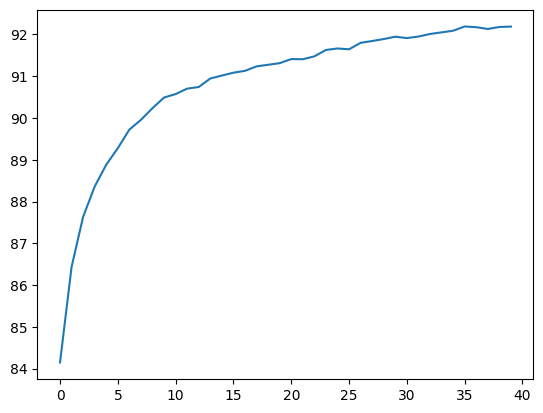

In [39]:
toplot = np.load('/notebooks/accdynamicmomentumimagenet40it.npy', allow_pickle = True)
toplot2 = np.load('/notebooks/accdynamicmomentumimagenet1e-01reg20it.npy', allow_pickle = True)
toplot3 = np.load('/notebooks/accdynamicmomentumimagenet1e-02reg20it.npy', allow_pickle = True)
toplot4 = np.load('/notebooks/accdynamicmomentumimagenet1e-03reg20it.npy', allow_pickle = True)
plt.plot(toplot)
#plt.plot(toplot2)
#plt.plot(toplot3)
#plt.plot(toplot4)